# Neural network classifier with TensorFlow 1

##### Video tutorial: https://www.youtube.com/watch?v=Y_hzMnRXjhI&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=3
##### Code: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb#scrollTo=4gs9htvM7n_x


### Load data + preprocessing

In [7]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [8]:
# import json - a built-in python package
import json

# load data and make it a python list
datastore = []
with open("data/Sarcasm_Headlines_Dataset.json", 'r') as f:
    for line in f:
        datastore.append(json.loads(line))

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

# view data
#datastore


In [9]:
# install more packages - I'm not sure exactly what all these lines do...
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenizer = Tokenizer(oov_token="<OOV>")
#tokenizer.fit_on_texts(sentences)
#word_index = tokenizer.word_index

#sequences = tokenizer.texts_to_sequences(sentences)
#padded = pad_sequences(sequences, padding='post')
#print(padded[0])
#print(padded.shape)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 90.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.0
    Uninstalling numpy-2.1.0:
      Successfully uninstalled numpy-2.1.0
Note: you may need to restart the kernel to use upda

In [10]:
# divide data into training and test sets
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [11]:
# only fit the tokenizer to the training set because the classifier shouldn't see the test data

# defining stuff (honestly not sure why all these numbers are what they are"
vocab_size = 10000
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# define tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# fit tokenizer to training set
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

# fit tokenizer to test set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

### For realz neural network code iihhh


In [12]:
# apparantly I need this to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
embedding_dim = 16 # don't know what this is

# this is the actual neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), # this is an embedding, where the direction of each word will be learned epoch by epoch
    tf.keras.layers.GlobalAveragePooling1D(), # here we pool with a global average pooling i.e. adding up the vectors as demonstrated earlier
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.summary() # emmm the table doesn't really show anything...

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 9s - 15ms/step - accuracy: 0.5484 - loss: 0.6834 - val_accuracy: 0.7456 - val_loss: 0.6445
Epoch 2/30
625/625 - 8s - 13ms/step - accuracy: 0.7576 - loss: 0.5231 - val_accuracy: 0.7728 - val_loss: 0.4629
Epoch 3/30
625/625 - 9s - 14ms/step - accuracy: 0.8302 - loss: 0.3920 - val_accuracy: 0.8195 - val_loss: 0.3915
Epoch 4/30
625/625 - 8s - 13ms/step - accuracy: 0.8564 - loss: 0.3388 - val_accuracy: 0.8496 - val_loss: 0.3511
Epoch 5/30
625/625 - 8s - 13ms/step - accuracy: 0.8739 - loss: 0.3015 - val_accuracy: 0.8420 - val_loss: 0.3530
Epoch 6/30
625/625 - 8s - 13ms/step - accuracy: 0.8870 - loss: 0.2767 - val_accuracy: 0.8459 - val_loss: 0.3463
Epoch 7/30
625/625 - 8s - 13ms/step - accuracy: 0.8967 - loss: 0.2534 - val_accuracy: 0.8191 - val_loss: 0.4039
Epoch 8/30
625/625 - 8s - 13ms/step - accuracy: 0.8988 - loss: 0.2419 - val_accuracy: 0.8238 - val_loss: 0.4004
Epoch 9/30
625/625 - 8s - 13ms/step - accuracy: 0.9101 - loss: 0.2253 - val_accuracy: 0.8463 - val_loss:

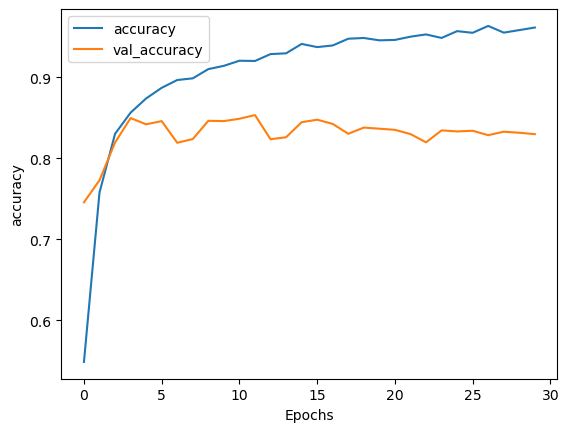

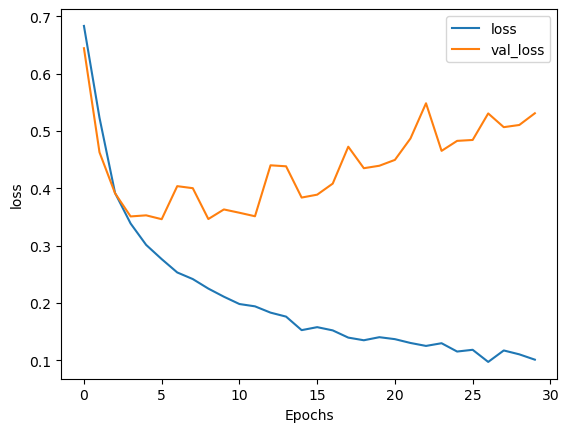

In [16]:
# plot model results
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### I'm not if this is where the section with the function to categorize sentences starts

In [17]:
# emmm I think I'm creating a function to categorize unseen data (sentences)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [18]:
# don't know what's happening here
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [19]:
# don't know what's happening here
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [20]:
# don't know what's happening here
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [21]:
# create random sentences (are they random tho or a part of the test set?? Nope, it can take random sentences)
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "I really love waking up at 7 am on Mondays"]

# use the tokenizer from earlier to convert the sentences into sequences. This way the words will have the same tokens as the training set.
sequences = tokenizer.texts_to_sequences(sentence)

# then pad those sequences to be the same dimensions as the those in the training set and use the same padding type
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# finally, predict on the padded set
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[0.40049756]
 [0.00105982]
 [0.00256345]]
